## READING THE DATA

In [ ]:
import pandas as pd
import seaborn as sns

data=pd.read_excel('/content/UCI_Real_Estate_Valuation.xlsx')
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
data.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [ ]:
data.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

## REMOVING UNNECESSARY COLUMNS

In [ ]:
data=data.drop(['No','X1 transaction date'],axis=1)
data.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


## SEPARATING X(INPUT) AND Y(OUTPUT) VALUES:

In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
x

array([[ 32.     ,  84.87882,  10.     ,  24.98298, 121.54024],
       [ 19.5    , 306.5947 ,   9.     ,  24.98034, 121.53951],
       [ 13.3    , 561.9845 ,   5.     ,  24.98746, 121.54391],
       ...,
       [ 18.8    , 390.9696 ,   7.     ,  24.97923, 121.53986],
       [  8.1    , 104.8101 ,   5.     ,  24.96674, 121.54067],
       [  6.5    ,  90.45606,   9.     ,  24.97433, 121.5431 ]])

## HOW EACH COLUMN RELATES TO THE OUTPUT

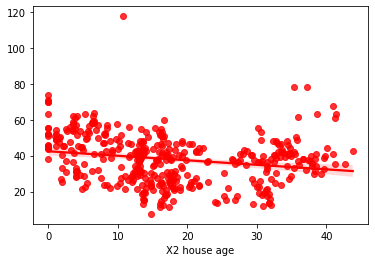

In [ ]:
#Age of the House
sns.regplot(x=data['X2 house age'],y=y,color='r')

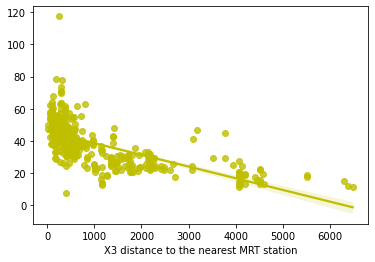

In [ ]:
#Distance from the house to metro station
sns.regplot(x=data['X3 distance to the nearest MRT station'],y=y,color='y')

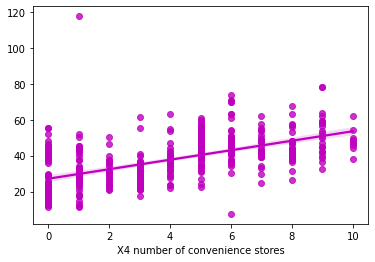

In [ ]:
#Distance from house to the convenience store
sns.regplot(x=data['X4 number of convenience stores'],y=y,color='m')

## SPLITTING THE DATA AS TRAINING AND TESTING DATA:

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=1)
x_train

array([[6.6000000e+00, 9.0456060e+01, 9.0000000e+00, 2.4974330e+01,
        1.2154310e+02],
       [4.0000000e+00, 2.1473760e+03, 3.0000000e+00, 2.4962990e+01,
        1.2151284e+02],
       [1.3200000e+01, 1.7126320e+03, 2.0000000e+00, 2.4964120e+01,
        1.2151670e+02],
       ...,
       [3.7100000e+01, 9.1863570e+02, 1.0000000e+00, 2.4971980e+01,
        1.2155063e+02],
       [1.2900000e+01, 2.5063100e+02, 7.0000000e+00, 2.4966060e+01,
        1.2154297e+02],
       [1.2000000e+01, 1.3601390e+03, 1.0000000e+00, 2.4952040e+01,
        1.2154842e+02]])

## NORMALIZATION OF THE DATA:

In [ ]:
from sklearn.preprocessing import StandardScaler
scal=StandardScaler()
scal.fit(x_train)
x_train=scal.transform(x_train)
x_test=scal.transform(x_test)
x_train

array([[-0.98451974, -0.77214567,  1.63014802,  0.40857545,  0.62027331],
       [-1.21094945,  0.8863712 , -0.39573749, -0.511367  , -1.38839831],
       [-0.40973664,  0.5358324 , -0.73338508, -0.41969725, -1.13216988],
       ...,
       [ 1.67167492, -0.10437543, -1.07103266,  0.21793482,  1.12011791],
       [-0.43586314, -0.64299487,  0.95485285, -0.26231732,  0.61164386],
       [-0.51424266,  0.25161347, -1.07103266, -1.39967121,  0.97341717]])

## IMPLEMENTING MULTIPLE LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

pred=model.predict(x_test)
pred

array([32.8437767 , 47.56101273, 23.17886484, 15.09828378, 44.26211594,
       32.95347245, 30.84818564, 44.37992909, 39.44957379, 12.20714107,
       13.72252023, 38.66414079, 30.698428  , 45.43304613, 52.19532146,
       33.61829886, 44.26211594, 43.08080094, 31.13517793, 46.10609663,
       52.27025625, 29.64604411, 40.26946944, 48.77519652, 46.08745018,
       28.71507026, 33.78364296, 45.14550741, 47.88009342, 14.49544621,
       35.65698532, 34.70756093, 40.49032967, 45.25005774, 48.35943494,
       14.14430663, 40.65785832, 40.33400387, 38.56668729, 15.01987102,
       41.48038538, 24.75178728])

In [ ]:
model.predict([[6.0,160.56840,10,24.97937,121.54245]])

array([-763.19055088])

## PERFORMANCE EVALUATION

In [ ]:
print(model.coef_)
print(model.intercept_)

[-3.00127223 -5.3883682   3.32309741  3.0133215  -0.22106562]
38.3857526881705


## ACTUAL VALUE TABLE AND PREDICTED VALUE TABLE

In [ ]:
error=pd.DataFrame({'Actual Value':y_test,'Predicted Value':pred})
error

,Actual Value,Predicted Value
0,27.3,32.843777
1,54.4,47.561013
2,22.0,23.178865
3,11.6,15.098284
4,45.4,44.262116
5,23.0,32.953472
6,21.8,30.848186
7,32.2,44.379929
8,37.4,39.449574
9,22.6,12.207141


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,pred))

from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test,pred))

from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

4.969264107071889
0.17303562839828057
0.76924367786983
